In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

#from movie_sentiment.processing.scripts import split_movie_script
#from movie_sentiment.ml_logic.vader import model as vadar
from movie_sentiment.ml_logic.movie_score import movie_score

In [12]:
movie_title = 'Up_1049413.txt'

X = movie_score(movie_title, chunk_type='words', pad=50, group_chunk=2, window_size=50)

In [15]:
type(X)

numpy.ndarray

In [5]:
movie_list = os.listdir('./raw_data/screenplay_data/data/raw_texts/raw_texts')

In [6]:
#moving average
import numpy as np
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    moving_avg = np.convolve(data, weights, 'valid')
    return moving_avg

In [7]:
import numpy as np
from scipy.ndimage import median_filter

def moving_median(data, window_size):
    # Pad the data array to handle edge cases
    padded_data = np.pad(data, (window_size//2, window_size//2), mode='reflect')
    
    # Apply median filter to the padded data with the specified window size
    smoothed_data = median_filter(padded_data, size=window_size)
    
    return smoothed_data[window_size//2:-window_size//2]

In [8]:
# Given the parameters for each movie title, calculates the text chunk scores
def movie_raw_score(movie_title, typer, pad, lower, group_chunk):
    
    movie_script_splitted = split_movie_script(movie_title, typer=typer, \
                                               pad=pad, lower=lower, rm_stopwords=False, \
                                               lemmatize=False)
    
    movie_script_scored = vadar(movie_script_splitted, group_chunk)
    
    return movie_script_scored

In [9]:
#Given a movie name and a list of parameters, plot different movie arcs

def arc_grid_search(movie_title):
    # plots the arc with different values for: sentence, pad, window_size for moving average
    
    lower = [False]
    pad = [5, 50]
    group_chunk = [1]
    window_size = [50]
    
    # Making all combinations: 
    unique_combinations = []
    for k in range(len(lower)):
        for i in range(len(pad)):
            for j in range(len(window_size)):
                for l in range(len(group_chunk)):
                    unique_combinations.append((lower[k],pad[i],window_size[j],group_chunk[l]))


    
    rows = len(pad) * len(window_size) * len(lower) * len(group_chunk)
    fig, axs = plt.subplots(rows,1, figsize=(10, 45))
    
#     # with sentence =True 
#     for i in range(len(unique_combinations)):
        
#         lower = unique_combinations[i][0]
#         pad = unique_combinations[i][1]
#         window_size = unique_combinations[i][2]
#         group_chunk= unique_combinations[i][3]
        
                                    
#         raw_score = movie_raw_score(movie_title, typer='sentence', pad=pad, lower=lower, group_chunk=group_chunk)
#         moving_avg = moving_average(raw_score['compound'], window_size)
#         print(f'step {i} - Sentence completed')
#         axs[i,0].plot(moving_avg)
#         axs[i,0].set_title(f'p={pad}, ws= {window_size},g={group_chunk},l={lower}', fontsize=8)
        
        
    
    # with sentence = False
    for i in range(len(unique_combinations)):
        
        lower = unique_combinations[i][0]
        pad = unique_combinations[i][1]
        window_size = unique_combinations[i][2]
        group_chunk= unique_combinations[i][3]
        
                                    
        raw_score = movie_raw_score(movie_title, typer='words', pad=pad, lower=lower, group_chunk=group_chunk,rm_stopwords=True)
        moving_avg = moving_average(raw_score['compound'], window_size)  
        print(f'step {i} - Words completed')
        axs[i].plot(moving_avg)
        axs[i].set_title(f'p={pad}, ws= {window_size},g={group_chunk},l={lower}', fontsize=8)
        


In [10]:
#arc_grid_search('Titanic_0120338.txt')

In [11]:
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter
from score_calculator.movie_raw_score import movie_raw_score
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'score_calculator'

In [ ]:
#movie_title = 'Up_1049413.txt'
movie_title = 'Titanic_0120338.txt'

X = movie_raw_score(movie_title, typer='words', pad=50, lower=False, group_chunk=1, rm_stopwords=True)

In [ ]:
X['compound_filtered'] = savgol_filter(X['compound'], window_length=200, polyorder=6)
X_Moving_average = moving_average(X['compound'], window_size=50)
X_MA_SV = savgol_filter(X_Moving_average, window_length=10, polyorder=5)
X_MM = moving_median(X['compound'], window_size=50)

fig, axs = plt.subplots(5,1, figsize=(10,6), constrained_layout = True)
axs[0].plot(X['compound'])
axs[0].set_ylim(-1,1)
axs[0].set_title('Raw values', fontsize = 8)

axs[1].plot(X_Moving_average)
axs[1].set_ylim(-1,1)
axs[1].set_title('moving Avg', fontsize = 8)

axs[2].plot(X['compound_filtered'])
axs[2].set_ylim(-1,1)
axs[2].set_title('SavGol filter', fontsize = 8)

axs[3].plot(X_MA_SV*10)
axs[3].set_ylim(-10,10)
axs[3].set_title('MA then SavGol filter', fontsize = 8)

axs[4].plot(X_MM)
axs[4].set_ylim(-1,1)
axs[4].set_title('Moving Median', fontsize = 8)

In [ ]:
from scipy.optimize import curve_fit


In [ ]:
coefficients = np.polyfit( x=np.arange(X_MM.shape[0]), y=X_MM, deg=3)
x_fit = np.arange(X_MM.shape[0])
y_fit = np.polyval(coefficients, x_fit)
plt.plot(x_fit, X_MM)
#plt.set_ylim(-1,1)
plt.plot(x_fit, y_fit, 'r')

In [27]:
from movie_sentiment.processing.arcs import get_all_dyn_arcs

In [28]:
arcs = get_all_dyn_arcs()

Loading data from pickle file


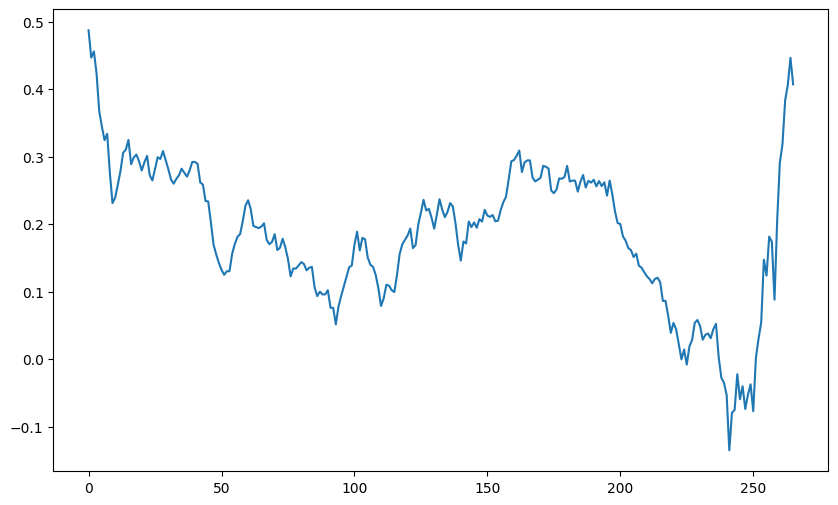

In [32]:
plt.figure(figsize=(10,6))

plt.plot(arcs['Up'])